# CRISP-DM Analysis for Task3

## 1. Business Understanding 
Tunnistetaa sivuja jota ovat phishing sivuja ja sivuja jotka eivät ole phishing sivuja. Tämä on tärkeää, koska phishing sivut ovat haitallisia ja voivat aiheuttaa vahinkoa käyttäjille.



In [21]:
%pip install ucimlrepo
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import warnings


Note: you may need to restart the kernel to use updated packages.


In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
phishing_websites = fetch_ucirepo(id=327) 
  
# data (as pandas dataframes) 
X = phishing_websites.data.features 
y = phishing_websites.data.targets 
  
# metadata 
phishing_websites.metadata
  




{'uci_id': 327,
 'name': 'Phishing Websites',
 'repository_url': 'https://archive.ics.uci.edu/dataset/327/phishing+websites',
 'data_url': 'https://archive.ics.uci.edu/static/public/327/data.csv',
 'abstract': 'This dataset collected mainly from: PhishTank archive, MillerSmiles archive, Googleâ€™s searching operators.',
 'area': 'Computer Science',
 'tasks': ['Classification'],
 'characteristics': ['Tabular'],
 'num_instances': 11055,
 'num_features': 30,
 'feature_types': ['Integer'],
 'demographics': [],
 'target_col': ['result'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2012,
 'last_updated': 'Tue Mar 05 2024',
 'dataset_doi': '10.24432/C51W2X',
 'creators': ['Rami Mohammad', 'Lee McCluskey'],
 'intro_paper': {'title': 'An assessment of features related to phishing websites using an automated technique',
  'authors': 'R. Mohammad, F. Thabtah, L. Mccluskey',
  'published_in': 'International Conference for Internet T

In [3]:
# variable information 
phishing_websites.variables

,name,role,type,demographic,description,units,missing_values
0,having_ip_address,Feature,Integer,None,None,None,no
1,url_length,Feature,Integer,None,None,None,no
2,shortining_service,Feature,Integer,None,None,None,no
3,having_at_symbol,Feature,Integer,None,None,None,no
4,double_slash_redirecting,Feature,Integer,None,None,None,no
5,prefix_suffix,Feature,Integer,None,None,None,no
6,having_sub_domain,Feature,Integer,None,None,None,no
7,sslfinal_state,Feature,Integer,None,None,None,no
8,domain_registration_length,Feature,Integer,None,None,None,no
9,favicon,Feature,Integer,None,None,None,no


## 2. Data Understanding

Data sisältää 11055 riviä ja 30 saraketta. Data sisältää seuraavat sarakkeet:

having_ip_address, url_length, shortining_service, having_at_symbol, double_slash_redirecting, prefix_suffix, having_sub_domains, ssl, final_state, domain_registration_length, favicon, rightclick, popupwindow, iframe, age_of_domain, dns, record, web_traffic, page_rank, google_index, links_pointing_to_page, statistical_report, result



## 3. Data Preparation
Data on jo siisti eikä siitä puutu arvoja. Dataa ei tarvitse siistiä ennen analyysiä, joten voimme siirtyä suoraan datan splitaamiseen.

Splitataan data


In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Modeling
käytin ensin DecisionTreeen, jonka jälkeen käytin RandomForestClassifieria. RandomForestClassifier antoi paremman tarkkuuden, joten käytän sitä.
käytin confusion matrixia mallin tarkkuuden arvioimiseen.

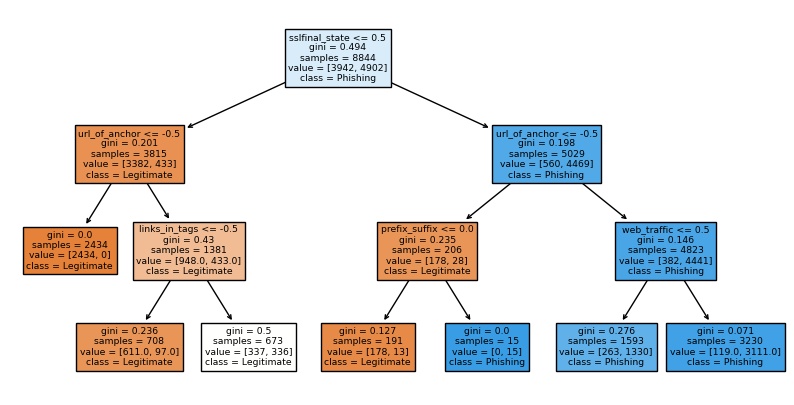

In [17]:

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
fig = plt.figure(figsize=(10,5))
plot_tree(model, filled=True, feature_names = X.keys() , class_names = ['Legitimate', 'Phishing'])
plt.show()




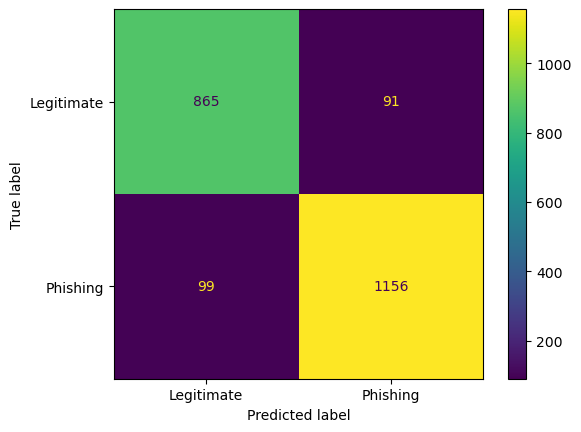

In [13]:
predections = model.predict(X_test)
confusion_matrix(y_test, predections)
tp, fn, fp, tn = confusion_matrix(y_test, predections).ravel()
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, predections), display_labels=['Legitimate', 'Phishing'])
display.plot()

1. Steppi: Onko sivulla käytössä https: jos ei sivu on todennäköisesti huijaus
2. Steppi: Onko sivulla epäilyttäviä linkkejä: jos on sivu on todennäköisesti huijaus
3. Steppi: Onko url:n sanojen välissä - merkkiä: jos on sivu on todennäköisesti huijaus

## 5. Evaluation
Arvoin eri randomforestclassifier malleja ja valitsin parhaan mallin.

In [39]:
def rfc(n):
    model = RandomForestClassifier(n_estimators=100, n_jobs=-1, bootstrap=True)
    model.fit(X_train, y_train)
    predections = model.predict(X_test)
    tp, fn, fp, tn = confusion_matrix(y_test, predections).ravel() ## tp = true positive, fn = false negative, fp = false positive, tn = true negative
    accuracy = (tp + tn) / (tp + fn + fp + tn)
    recall = tp / (tp + fn)
    print(f'Estimators: {n} , Accuracy: {accuracy}, Recall: {recall}')
    

In [43]:
warnings.filterwarnings('ignore')
rfc(100)
rfc(200)
rfc(300)
rfc(400)
rfc(500)
rfc(600)
rfc(700)


Estimators: 100 , Accuracy: 0.9669832654907282, Recall: 0.950836820083682
Estimators: 200 , Accuracy: 0.9665309814563546, Recall: 0.9497907949790795
Estimators: 300 , Accuracy: 0.9669832654907282, Recall: 0.9497907949790795
Estimators: 400 , Accuracy: 0.9687924016282226, Recall: 0.9518828451882845
Estimators: 500 , Accuracy: 0.966078697421981, Recall: 0.950836820083682
Estimators: 600 , Accuracy: 0.9665309814563546, Recall: 0.950836820083682
Estimators: 700 , Accuracy: 0.9656264133876075, Recall: 0.948744769874477


Otin 400 koska sen accuracy oli suurin 

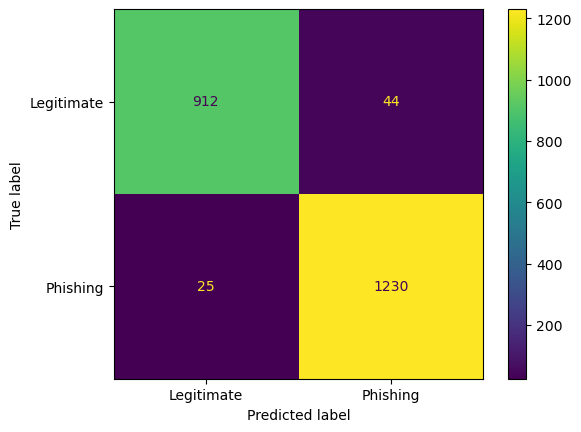

In [44]:
model = RandomForestClassifier(n_estimators=400, n_jobs=-1, bootstrap=True)
model.fit(X_train, y_train)
predections = model.predict(X_test)
tp, fn, fp, tn = confusion_matrix(y_test, predections).ravel()
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, predections), display_labels=['Legitimate', 'Phishing'])
display.plot()

## 6. Deployment
jaettu githubiin